In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop


# Data Loading & Preprocessing

In [2]:
val_batch = 10
train_batch = 32
train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.30,
        )
train_generator = train_datagen.flow_from_directory(
        './datasets/flowers',
        target_size=(80, 80),
        batch_size=train_batch,
        class_mode='categorical',
        subset = 'training',
        color_mode = 'grayscale',
        shuffle = True,
        )
validation_generator = train_datagen.flow_from_directory(
        './datasets/flowers',
        target_size=(80, 80),
        batch_size=val_batch,
        class_mode='categorical',
        subset = 'validation',
        color_mode = 'grayscale',
        shuffle= True)


Found 3028 images belonging to 5 classes.
Found 1295 images belonging to 5 classes.


In [3]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [4]:
type(train_datagen)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [5]:
type(train_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [6]:
train_generator[31][1].shape

(32, 5)

# DL Model

In [7]:
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5,  activation='softmax'))

In [8]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [9]:
with tf.device('/device:GPU:0'):
    result = model.fit(
          train_generator,
          steps_per_epoch = 20,
          batch_size = train_batch,
          validation_data = validation_generator,
          validation_batch_size= val_batch,
          epochs=50)

Epoch 1/50
20/20 [==============================] - 9s 437ms/step - loss: 11.2810 - accuracy: 0.2044 - val_loss: 2.5716 - val_accuracy: 0.2456
Epoch 2/50
20/20 [==============================] - 7s 365ms/step - loss: 2.2352 - accuracy: 0.2371 - val_loss: 2.4736 - val_accuracy: 0.2417
Epoch 3/50
20/20 [==============================] - 7s 359ms/step - loss: 2.1927 - accuracy: 0.2181 - val_loss: 1.7773 - val_accuracy: 0.2432
Epoch 4/50
20/20 [==============================] - 7s 363ms/step - loss: 1.8480 - accuracy: 0.1840 - val_loss: 1.6780 - val_accuracy: 0.2440
Epoch 5/50
20/20 [==============================] - 7s 369ms/step - loss: 1.6504 - accuracy: 0.2637 - val_loss: 1.6443 - val_accuracy: 0.2432
Epoch 6/50
20/20 [==============================] - 8s 429ms/step - loss: 1.6991 - accuracy: 0.2591 - val_loss: 1.6778 - val_accuracy: 0.2463
Epoch 7/50
20/20 [==============================] - 8s 437ms/step - loss: 1.6920 - accuracy: 0.2491 - val_loss: 1.7347 - val_accuracy: 0.2641
Epoch

# Evaluation, Prediction & Graphs (Accurac, Loss)

In [10]:
model.evaluate(validation_generator)

130/130 [==============================] - 5s 39ms/step - loss: 1.6256 - accuracy: 0.2888


[1.6255884170532227, 0.2888031005859375]

In [11]:
x = result.history.keys()
x

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

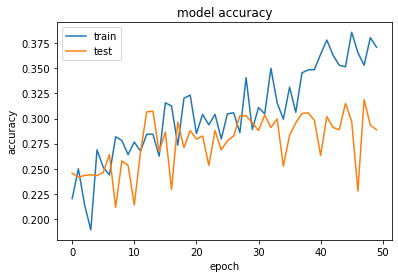

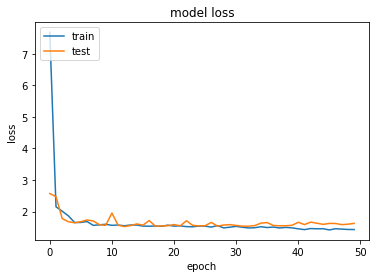

In [12]:

# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
y_pred1 = model.predict(validation_generator)

In [14]:
y_pred1.shape

(1295, 5)

In [15]:
list1 = []
for i in range(0,len(validation_generator)):
    for j in range(0,val_batch):
        try:
              list1.append(validation_generator[i][1][j].tolist())
        except:
              break

In [16]:
np.argmax(y_pred1, axis=1)[45:60]

array([3, 0, 0, 3, 1, 0, 0, 4, 4, 3, 3, 1, 4, 4, 3], dtype=int64)

In [17]:
np.argmax(list1[45:60],axis=1)

array([2, 3, 1, 1, 0, 1, 4, 4, 4, 4, 3, 2, 2, 2, 4], dtype=int64)